In [1]:
import matplotlib.pyplot as plt
# loading dataset
# from Loading_dataset import load_pd_file
import pandas as pd

try:
    file_location = input("Enter the file location: ")
    loaded_data_pd = pd.read_csv(file_location, encoding='utf-8')
    print(f"\nFetching data...\nSuccessfully loaded the {file_location} pandas dataset.")
#     return phone_data
except pd.errors.EmptyDataError:
    print(f"Empty CSV file: {file_location}")
except FileNotFoundError:
    print(f"File not found: {file_location}")
except pd.errors.ParserError:
    print(f"Couldn't read {file_location}. It may not be a valid CSV file.")
except Exception as e:
    print(f"An error occurred while loading the file: {str(e)}")

Enter the file location: device_features.csv

Fetching data...
Successfully loaded the device_features.csv pandas dataset.


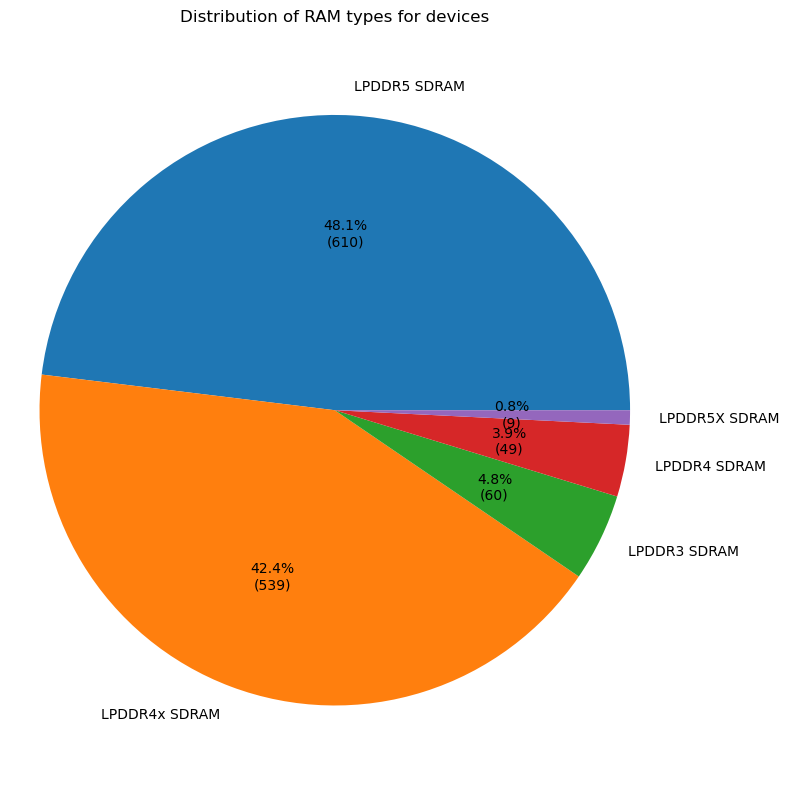

In [2]:
# Create a chart to visually represent the proportion of RAM types for devices in the current market
def ram_type_proportion(loaded_data_pd):
    
    ram_counts = loaded_data_pd['ram_type'].value_counts()
    
    def label_format(pct, allvals):
        count = int(pct / 100.0 * sum(allvals))
        return f'{pct:.1f}%\n({count})'
    
    plt.figure(figsize=(8, 8))
    plt.pie(ram_counts.values, labels=ram_counts.index, autopct=lambda pct: label_format(pct, ram_counts.values))
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Distribution of RAM types for devices')

    plt.show()

# Call the function
ram_type_proportion(loaded_data_pd)


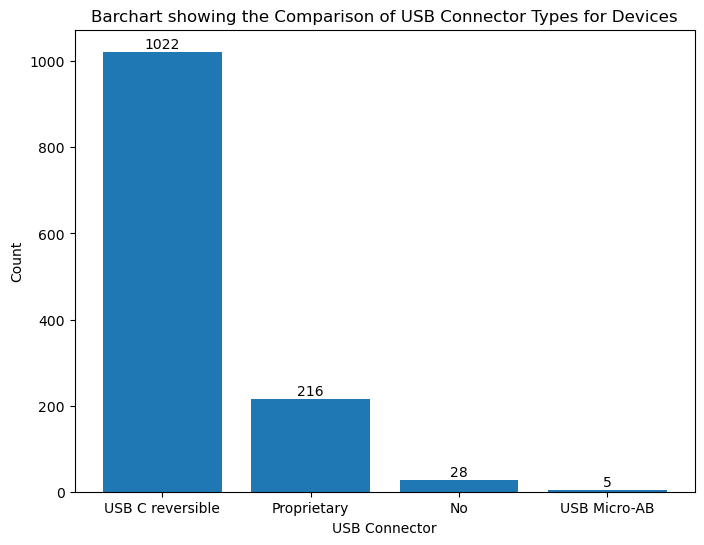

In [3]:
# Create a chart to visually compare the number of devices for each USB connector type
def usb_connector_comparison(loaded_data_pd):
    usb_connector_counts = loaded_data_pd['usb_connector'].value_counts()
    # Create the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(usb_connector_counts.index, usb_connector_counts.values)

    # Set labels and title
    plt.xlabel('USB Connector')
    plt.ylabel('Count')
    plt.title('Barchart showing the Comparison of USB Connector Types for Devices')
    
    # Display the counts above the bars
    for index, value in enumerate(usb_connector_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')
    

    plt.show()
    
usb_connector_comparison(loaded_data_pd)

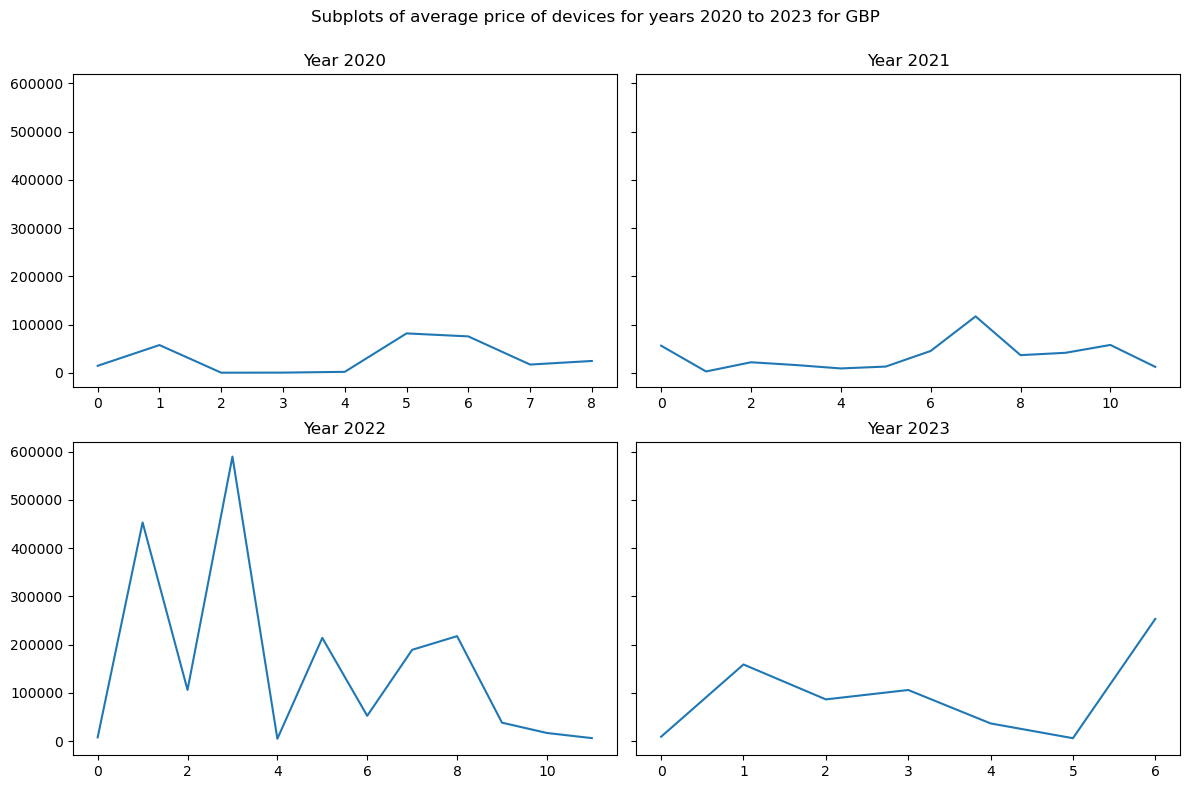

In [4]:
def subplot_GBP(loaded_data_pd):
    # Assuming 'released_date' is in the format 'dd-mm-yyyy'
    loaded_data_pd['released_date'] = pd.to_datetime(loaded_data_pd['released_date'], format='%d-%m-%y')

    # Extract the years and create a new column
    loaded_data_pd['released_year'] = loaded_data_pd['released_date'].dt.year
    loaded_data_pd['released_month'] = loaded_data_pd['released_date'].dt.month

    # Display the DataFrame with the brand and released year
    # print(loaded_data_pd['released_year'])

    # Split the data by year into separate DataFrames
    yearly_data = {}
    for year, data in loaded_data_pd.groupby('released_year'):
        yearly_data[year] = data

    GBP_2020 = yearly_data[2020]
    GBP_2021 = yearly_data[2021]
    GBP_2022 = yearly_data[2022]
    GBP_2023 = yearly_data[2023]
    # Group by year and month and calculate the average price for each month
    monthly_average_prices_2020 = GBP_2020.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2021 = GBP_2021.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2022 = GBP_2022.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2023 = GBP_2023.groupby(['released_year', 'released_month'])['price'].mean().reset_index()

    monthly_average_prices_2020.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2021.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2022.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2023.rename(columns={'price': 'average_price(GBP)'}, inplace=True)


    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

    # Plot line graph for Year 2019
    axs[0, 0].plot(monthly_average_prices_2020['average_price(GBP)'])
    axs[0, 0].set_title('Year 2020')

    # Plot line graph for Year 2020
    axs[0, 1].plot(monthly_average_prices_2021['average_price(GBP)'])
    axs[0, 1].set_title('Year 2021')

    # Plot line graph for Year 2021
    axs[1, 0].plot(monthly_average_prices_2022['average_price(GBP)'])
    axs[1, 0].set_title('Year 2022')

    # Plot line graph for Year 2022
    axs[1, 1].plot(monthly_average_prices_2023['average_price(GBP)'])
    axs[1, 1].set_title('Year 2023')

    # Adjust spacing between subplots
    fig.tight_layout()
    fig.suptitle('Subplots of average price of devices for years 2020 to 2023 for GBP')
    plt.subplots_adjust(top=0.9)
    # Show the plot
    plt.show()
    
subplot_GBP(loaded_data_pd)

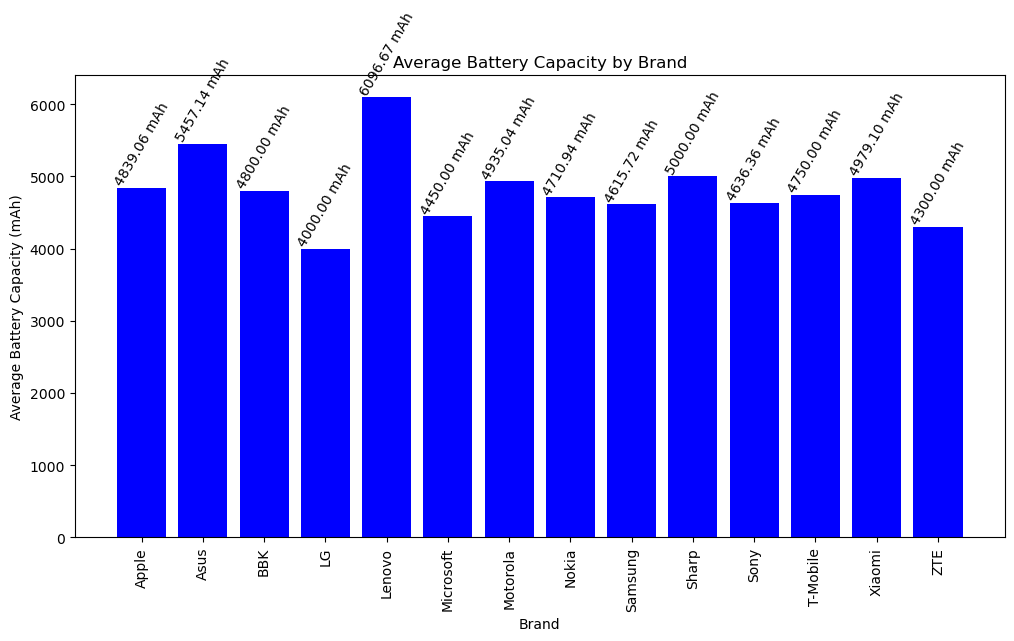

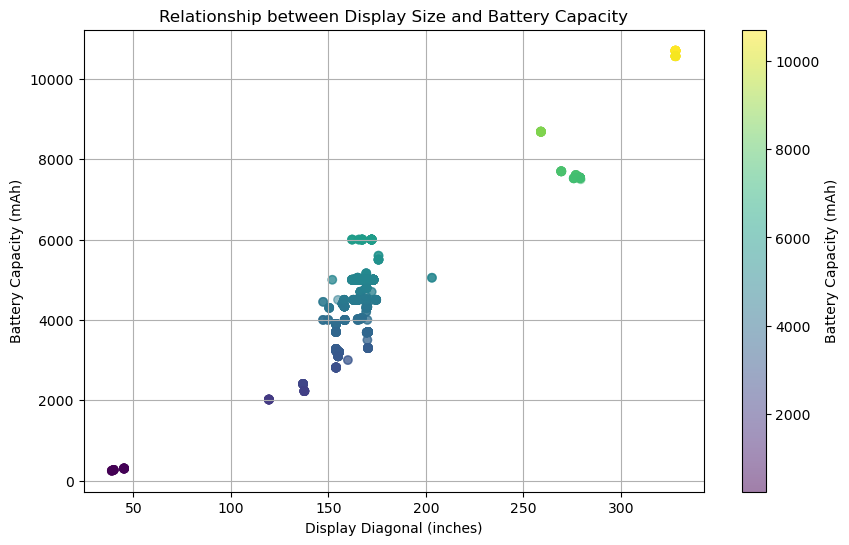

In [5]:
def vis_brand(loaded_data_pd):
    # Extract the numeric battery capacities from the format "5000 mAh battery"
    loaded_data_pd['battery_capacity'] = loaded_data_pd['battery_capacity'].str.extract('(\d+)').astype(float)


    # Group data by brand and calculate average battery capacity and display size
    brand_stats = loaded_data_pd.groupby('brand')[['battery_capacity', 'display_diagonal']].mean()
    # Create a bar chart to compare average battery capacity by brand
    plt.figure(figsize=(12, 6))
    plt.bar(brand_stats.index, brand_stats['battery_capacity'], color='blue')
    plt.xlabel('Brand')
    plt.ylabel('Average Battery Capacity (mAh)')
    plt.title('Average Battery Capacity by Brand')
    plt.xticks(rotation=90)

    # Display the counts above the bars
    for index, value in enumerate(brand_stats['battery_capacity']):
        plt.text(index, value, f"{value:.2f} mAh", ha='center', va='bottom',rotation=60)

    # Show the chart
    plt.show()

    # Create a scatter plot to show the relationship between display size and battery capacity
    # Create a scatter plot with a color gradient
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        loaded_data_pd['display_diagonal'],
        loaded_data_pd['battery_capacity'],
        c=loaded_data_pd['battery_capacity'],  # Use battery capacity for color gradient
        cmap='viridis',  # You can choose any colormap you prefer
        alpha=0.5
    )
    plt.xlabel('Display Diagonal (inches)')
    plt.ylabel('Battery Capacity (mAh)')
    plt.title('Relationship between Display Size and Battery Capacity')
    plt.grid()

    # Create a colorbar to show the legend for the color gradient
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Battery Capacity (mAh)')

    # Show the scatter plot
    plt.show()

vis_brand(loaded_data_pd)

In [ ]:
loaded

In [8]:
def average_ppr():
    # Create a bar chart to visualize the average Price-Performance Ratio for all devices
    # Group by brand and calculate the average Price-Performance Ratio
    average_ppr_by_brand = df.groupby('brand')['Price_Performance_Ratio'].mean().reset_index()
    # Create a bar chart to visualize the average Price-Performance Ratio for different brands
    plt.figure(figsize=(10, 6))
    plt.bar(average_ppr_by_brand['brand'], average_ppr_by_brand['Price_Performance_Ratio'])
    plt.xlabel('Brand')
    plt.ylabel('Average Price-Performance Ratio')
    plt.title('Average Price-Performance Ratio for Different Brands')
    plt.xticks(rotation=45)

    # Display the values for the bars
    for index, value in enumerate(average_ppr_by_brand['Price_Performance_Ratio']):
        plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

    plt.tight_layout()

    # Save the chart to an image file (optional)
    plt.savefig("average_price_performance_chart.png")

    # Show the chart
    plt.show()
# average_ppr()